In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# upload the shapefile in shapefile folder and show the columns
shapefile = gpd.read_file("shapefile/dc841dq9031.shp")

In [3]:
df = pd.read_csv("ev-zipcode-demographics.csv")

In [ ]:


# Vehicle types in the dataset
vehicle_types = ['Diesel', 'Electric', 'Flex_Fuel', 'Gasoline', 'Gasoline_Hybrid', 'Hydrogen', 'Natural_Gas', 'PHEV', 'Propane']

# Summing up the total number of each vehicle type
total_vehicles_by_type = df[vehicle_types].sum()

# Calculating the total number of vehicles
total_vehicles = total_vehicles_by_type.sum()

# Calculating the percentage of each vehicle type
vehicle_type_percentages = (total_vehicles_by_type / total_vehicles) * 100

# Sorting the percentages in descending order
vehicle_type_percentages_sorted = vehicle_type_percentages.sort_values(ascending=False)

# Creating a bar chart with the sorted data
plt.figure(figsize=(10, 6))
vehicle_type_percentages_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Total Vehicle Types Relative to Total Number of Vehicles')
plt.xlabel('Vehicle Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("bar_chart.png", format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white')
plt.show()


/tmp/ipykernel_15242/2273133892.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, orientation='horizontal', pad=0.04, aspect=20, shrink=0.3)


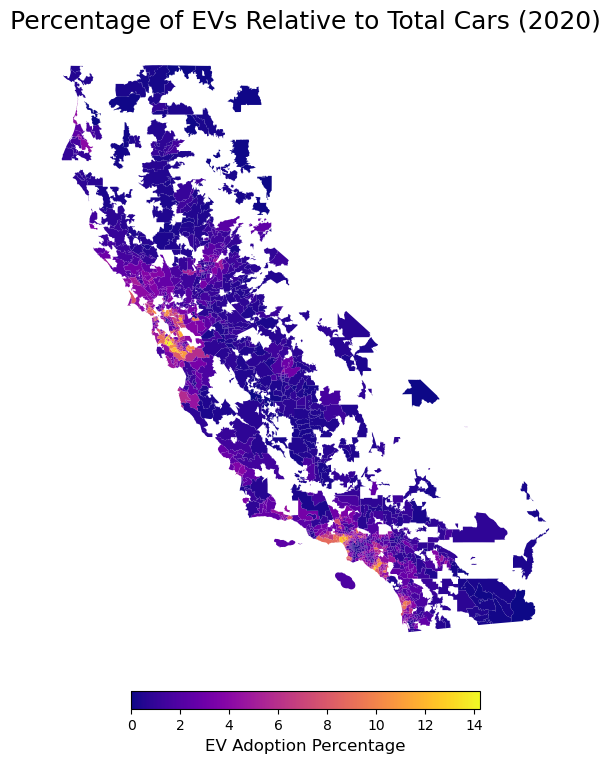

In [4]:
def plot_heatmap(df, column_name, shape_df, zip_column='ZIP', shape_zip_column='zcta'):
    """
    Enhanced version of the heatmap plotting function with a smaller horizontal legend.
    """
    # Convert ZIP code columns to strings for consistent merging
    df[zip_column] = df[zip_column].astype(str)
    shape_df[shape_zip_column] = shape_df[shape_zip_column].astype(str)

    # Merge the DataFrame with the shapefile on ZIP code
    merged = shape_df.merge(df, left_on=shape_zip_column, right_on=zip_column, how='left')

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged.plot(column=column_name, ax=ax, cmap='plasma', legend=False)
    ax.set_axis_off()
    ax.set_title("Percentage of EVs Relative to Total Cars (2020)", fontdict={'fontsize': '18', 'fontweight' : '2'})

    # Customizing the legend
    sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=df[column_name].min(), vmax=df[column_name].max()))
    sm._A = []
    cbar = fig.colorbar(sm, orientation='horizontal', pad=0.04, aspect=20, shrink=0.3)
    cbar.set_label('EV Adoption Percentage', fontsize=12)
    plt.savefig("heatmap.png", format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

    plt.show()





# Test the function with a column from the ev_data, for example, 'Electric'
plot_heatmap(df, 'EV_perc', shapefile)


In [6]:
san_diego_only = [
    91911, 92154, 92592, 91910, 92126, 92105, 92021, 92114, 91977, 92562,
    92020, 92115, 92071, 92027, 91950, 92130, 92129, 92056, 92057, 91913,
    92117, 92024, 92113, 92028, 92025, 92026, 92084, 92111, 92127, 92078,
    92064, 92128, 92009, 92104, 92122, 92069, 92040, 92109, 92019, 92101,
    92102, 91942, 92675, 92054, 92037, 92065, 92672, 92131, 92083, 92058,
    92139, 92123, 91915, 91941, 92103, 92673, 92124, 92110, 92107, 92116,
    92173, 92008, 92081, 92120, 91945, 91932, 92119, 92011, 92029, 92082,
    92108, 92106, 91902, 91901, 92010, 92055, 91914, 92118, 92014, 92075,
    91978, 92007, 91935, 92067, 92121, 92003, 91906, 92539, 92004, 92136,
    92036, 91962, 92140, 91917, 92135, 91916, 92061, 92086, 91905, 92259,
    92059, 92182, 92091, 91934, 92070, 92066, 91990, 92132, 92147, 91963,
    92134, 91931, 92060, 91948, 91947, 92162, 92164, 92184, 92190, 92194,
    92090, 91980, 92093, 92161, 92133, 91921, 91933, 91943, 91944, 91946,
    91951, 91976, 91979, 91987, 92013, 92018, 92022, 92023, 92030, 92033,
    92038, 92039, 92049, 92046, 92052, 92051, 92068, 92074, 92072, 92079,
    92085, 92088, 92092, 92096, 92112, 92138, 92137, 92143, 92142, 92145,
    92150, 92149, 92153, 92152, 92155, 92159, 92158, 92160, 92163, 92165,
    92167, 92166, 92169, 92168, 92171, 92170, 92172, 92175, 92174, 92177,
    92176, 92179, 92178, 92187, 92186, 92191, 92193, 92192, 92195, 92197,
    92196, 92199, 92198, 91903, 91908, 91909, 91912
]

all_zips = df['ZIP'].values.tolist()

In [7]:
# Sum 'Total_Cars'
total_cars = df['Total_Cars'].sum()

# Sum totals from the 'Electric' and 'PHEV' columns
total_evs = df['Electric'].sum() + df['PHEV'].sum()

In [8]:
print(total_cars)
print(total_evs)

28907077
812585


In [9]:
# Convert the values in san_diego_only to strings
san_diego_only = [str(z) for z in san_diego_only]

In [10]:
# make a copy of df
df_sd = df.copy()

In [11]:
# Filter df_sd for only the values of 'ZIP' in san_diego_only
df_sd = df_sd[df_sd['ZIP'].isin(san_diego_only)]
df_sd.shape

(101, 21)

In [12]:
# Sum 'Total_Cars'
sd_total_cars = df_sd['Total_Cars'].sum()

# Sum totals from the 'Electric' and 'PHEV' columns
sd_total_evs = df_sd['Electric'].sum() + df['PHEV'].sum()

In [13]:
print(sd_total_cars)
print(sd_total_evs)

2718114
348847


In [14]:
def create_simple_donut_chart(A, B, title):
    """
    Creates a simple donut chart for two integer values A and B.

    Parameters:
    A (int): First integer value.
    B (int): Second integer value.
    Title (str): Title of the chart.

    Output:
    A donut chart.
    """

    # Data for the pie chart
    chart_data = [A, B]
    labels = ['Electric', 'Non-Electric']
    colors = ['#ff9999','#66b3ff']

    # Creating the donut chart
    plt.figure(figsize=(7, 7))
    plt.pie(chart_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=(0.1, 0))

    # Center circle for a donut-like pie chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(title, fontsize=16, loc='center')

    # Save the plot as a PNG file with a unique name
    plt.savefig(f'{title}.png', format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white')
    plt.show()

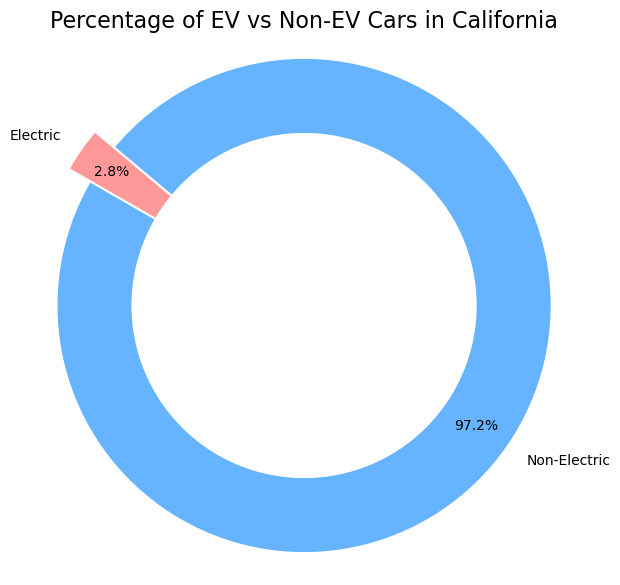

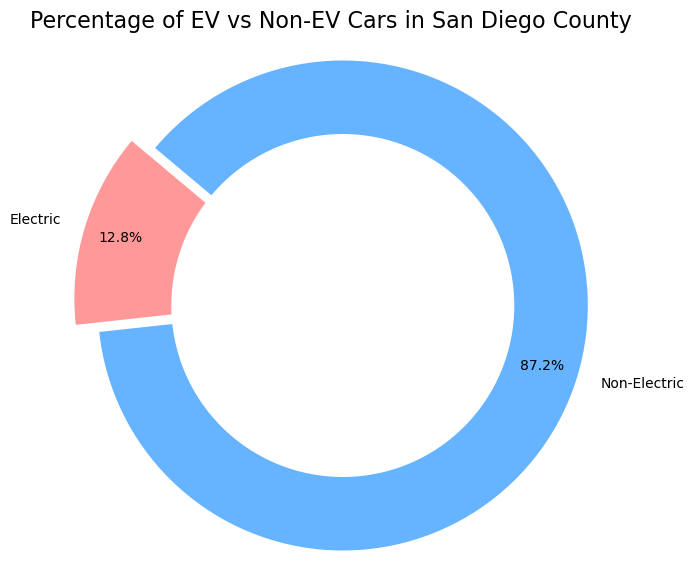

In [15]:
create_simple_donut_chart(total_evs, total_cars - total_evs, "Percentage of EV vs Non-EV Cars in California")
create_simple_donut_chart(sd_total_evs, sd_total_cars - sd_total_evs, "Percentage of EV vs Non-EV Cars in San Diego County")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

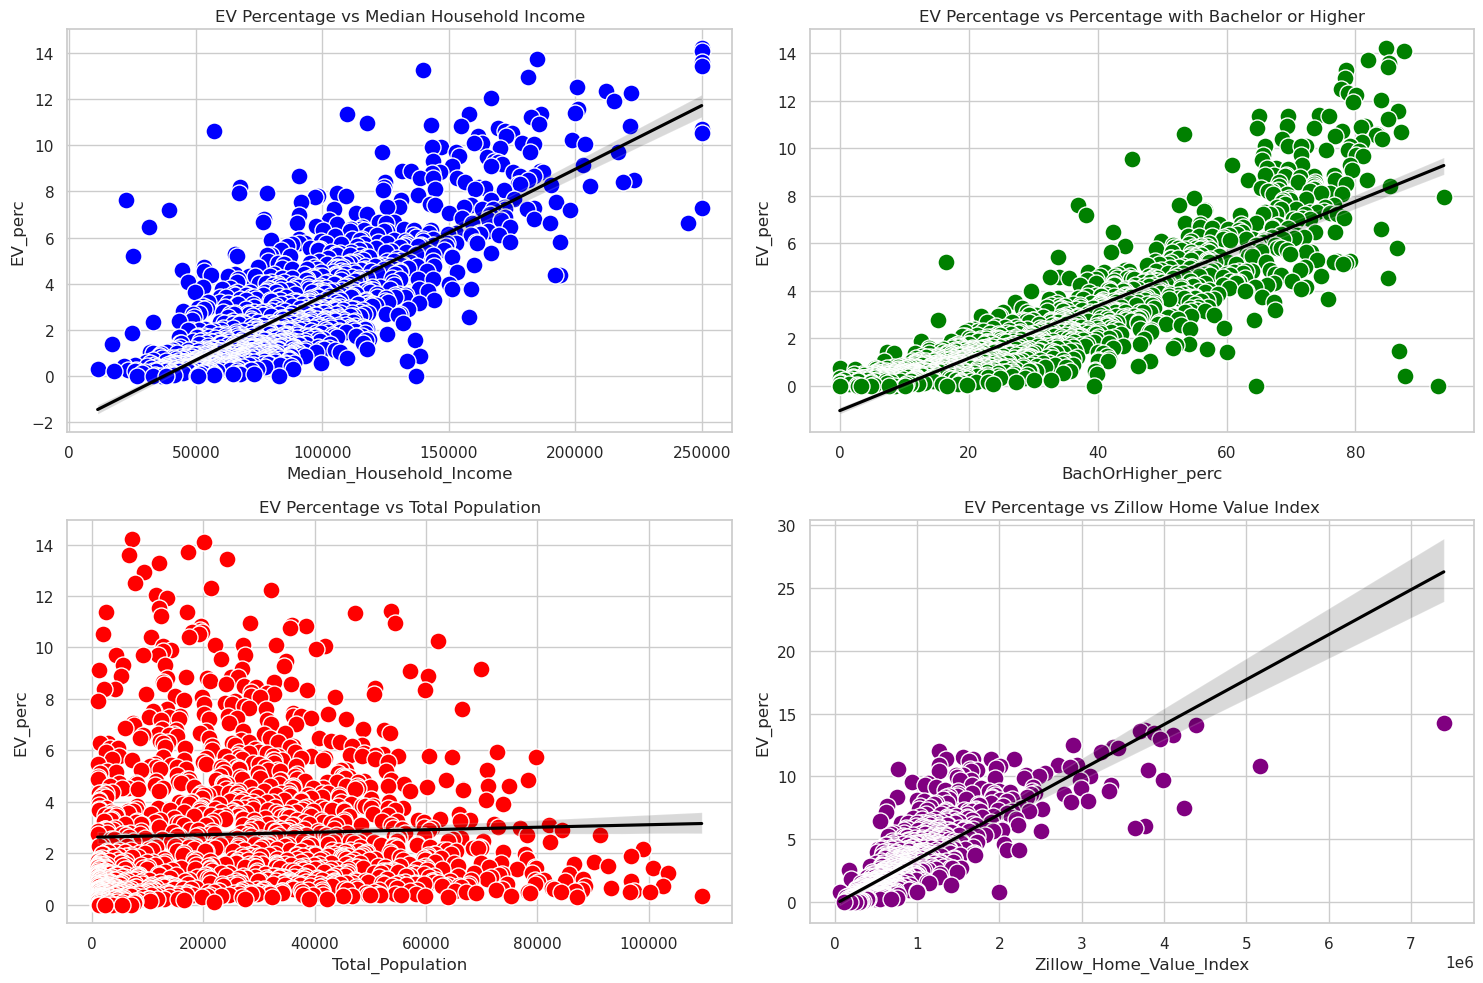

In [16]:

# Setting up the aesthetic style for the plots
sns.set(style="whitegrid")

# Creating a 2x2 subplot structure
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot 1: EV_perc vs Median_Household_Income
sns.scatterplot(x='Median_Household_Income', y='EV_perc', data=df, ax=axs[0, 0], color='blue', edgecolor='w', s=150)
axs[0, 0].set_title('EV Percentage vs Median Household Income')
axs[0, 0].set_xlabel('Median Household Income')
axs[0, 0].set_ylabel('EV Percentage')
sns.regplot(x='Median_Household_Income', y='EV_perc', data=df, ax=axs[0, 0], scatter=False, color='black')


# Scatter plot 2: EV_perc vs BachOrHigher_perc
sns.scatterplot(x='BachOrHigher_perc', y='EV_perc', data=df, ax=axs[0, 1], color='green', edgecolor='w', s=150)
axs[0, 1].set_title('EV Percentage vs Percentage with Bachelor or Higher')
axs[0, 1].set_xlabel('Percentage with Bachelor or Higher')
axs[0, 1].set_ylabel('EV Percentage')
# Draw a line of best fit
sns.regplot(x='BachOrHigher_perc', y='EV_perc', data=df, ax=axs[0, 1], scatter=False, color='black')

# Scatter plot 3: EV_perc vs Total_Population
sns.scatterplot(x='Total_Population', y='EV_perc', data=df, ax=axs[1, 0], color='red', edgecolor='w', s=150)
axs[1, 0].set_title('EV Percentage vs Total Population')
axs[1, 0].set_xlabel('Total Population')
axs[1, 0].set_ylabel('EV Percentage')
sns.regplot(x='Total_Population', y='EV_perc', data=df, ax=axs[1, 0], scatter=False, color='black')

# Scatter plot 4: EV_perc vs Zillow_Home_Value_Index
sns.scatterplot(x='Zillow_Home_Value_Index', y='EV_perc', data=df, ax=axs[1, 1], color='purple', edgecolor='w', s=150)
axs[1, 1].set_title('EV Percentage vs Zillow Home Value Index')
axs[1, 1].set_xlabel('Zillow Home Value Index')
axs[1, 1].set_ylabel('EV Percentage')
sns.regplot(x='Zillow_Home_Value_Index', y='EV_perc', data=df, ax=axs[1, 1], scatter=False, color='black')

# Adjust layout to prevent overlap
plt.savefig('scatterplots.png', format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white')
plt.tight_layout()
plt.show()


